# Step 1 : Reading the data and data understanding

In [1]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
# Importing dataset

df_leadInfo = pd.read_csv('Leads.csv', encoding = 'latin')
df_leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# inspecting the df_leadInfo dataframe

print(" ------------- Checking Info -------------") 
print(df_leadInfo.info())
print(" ------------- Checking Shape -------------") 
print(df_leadInfo.shape)
print(" ------------- Columns which have null values -------------")
print(df_leadInfo.isnull().any())
print(" ------------- Describe -------------")
df_leadInfo.describe()

 ------------- Checking Info -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page View

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2 : Cleaning the data

In [6]:
# checking for the percent null values in each of the columns

null_percent = round(100*(df_leadInfo.isnull().sum()/len(df_leadInfo.index)), 2)
print(null_percent)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Some columns have more than 25% null values

In [7]:
# Checking for duplicate values in the dataset

df_leadInfo[df_leadInfo.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There aren't any duplicate values in the dataset

In [8]:
# The following columns have a value called select. Lets convert such values as nan as the customer hasn't selected any options for 
# all these columns while entering the data.

# These columns are:

# 1) Specialization
# 2) How did you hear about X Education
# 3) Lead Profile
# 4) City

# Lets convert 'Select' to NaN.


df_leadInfo['Specialization'] = df_leadInfo['Specialization'].replace('Select', np.nan)
df_leadInfo['How did you hear about X Education'] = df_leadInfo['How did you hear about X Education'].replace('Select', np.nan)
df_leadInfo['Lead Profile'] = df_leadInfo['Lead Profile'].replace('Select', np.nan)
df_leadInfo['City'] = df_leadInfo['City'].replace('Select', np.nan)

In [9]:
# lets check for percentage of null values in each column again

null_percent = round(100*(df_leadInfo.isnull().sum()/len(df_leadInfo.index)), 2)
print(null_percent)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Now Lets drop the following columns that have more than 30% null values

# 1) Specialization
# 2) How did you hear about X Education
# 3) Tags
# 4) Lead Quality
# 5) Lead Profile
# 6) City
# 7) Asymmetrique Activity Index
# 8) Asymmetrique Profile Index
# 9) Asymmetrique Activity Score
# 10) Asymmetrique Profile Score

df_leadInfo = df_leadInfo.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [11]:
# Now lets check for percentage of null values in each column after dropping the columns which had more than 30% null values

null_percent = round(100*(df_leadInfo.isnull().sum()/len(df_leadInfo.index)), 2)
print(null_percent)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

So, following are the columns which have null values :-

Country, Lead Source, Total Visits, Page Views Per Visit, Last Activity, What is your current occupation, What matters most to you in choosing a course

Now, lets decide whether to impute values in the above columns or drop them.

In [12]:
# value counts for each values in the country column

df_leadInfo.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [13]:
# percentage of India as value in the country column

india_percent = round(100*len(df_leadInfo[df_leadInfo['Country'] == 'India'])/len(df_leadInfo['Country']),2)
print(india_percent)

70.26


In [14]:
# As "India" is occuring around 70% of the times in the Country column and country column also has around 27% as missing values, 
# we should drop the country column

df_leadInfo = df_leadInfo.drop(['Country'], axis=1)

In [15]:
# Checking the value counts for Lead Source

df_leadInfo['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [16]:
# converting 'google' to 'Google' in the Lead Source column

df_leadInfo['Lead Source'] = df_leadInfo['Lead Source'].replace('google', 'Google')

In [17]:
# imputing null values in the Lead Source column by 'Google' 

df_leadInfo['Lead Source'] = df_leadInfo['Lead Source'].replace(np.nan, 'Google')

In [18]:
# Checking the median of the Total Visits columns

df_leadInfo['TotalVisits'].median()

3.0

In [19]:
# Lets impute the null values in Total Visits column by the median value

df_leadInfo['TotalVisits'] = df_leadInfo['TotalVisits'].replace(np.nan, df_leadInfo['TotalVisits'].median())

In [20]:
# Checking value counts for Page Views Per Visit column

df_leadInfo['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [21]:
# Checking the median of the column

df_leadInfo['Page Views Per Visit'].median()

2.0

In [22]:
# Lets impute the null values in 'Page Views Per Visit' by the median value

df_leadInfo['Page Views Per Visit'] = df_leadInfo['Page Views Per Visit'].replace(np.nan, df_leadInfo['Page Views Per Visit'].median())

In [23]:
# Checking the value counts for the Last Activity column

df_leadInfo['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [24]:
# Since we cannot say anything about the last activity of the customer, we should add a new category 
# called 'Not Sure' for the null values

df_leadInfo['Last Activity'] = df_leadInfo['Last Activity'].replace(np.nan, 'Not Sure')

In [25]:
# Checking the value counts for the column "What is your current Occupation"

df_leadInfo['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
# We can replace null values in the 'What is your current occupation' with a new category called No information

df_leadInfo['What is your current occupation'] = df_leadInfo['What is your current occupation'].replace(np.nan, 'No Information')

In [27]:
# Checking the value counts for the column 'What matters most to you in choosing a course' 

df_leadInfo['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
# Percentage of 'Better Career Prospects' in 'What matters most to you in choosing a course' column

what_matters_most_perc = round(100*len(df_leadInfo[df_leadInfo['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(df_leadInfo['What matters most to you in choosing a course']),2)
print(what_matters_most_perc)

70.65


In [29]:
# 'Better Career Prospects' occurs 70% of times in the 'What matters most to you in choosing a course' column and
# since the column also has around 29% of missing values we can drop the column

df_leadInfo = df_leadInfo.drop(['What matters most to you in choosing a course'], axis=1)

In [30]:
# Checking for percentage of null values in each column again

null_percent = round(100*(df_leadInfo.isnull().sum()/len(df_leadInfo.index)), 2)
print(null_percent)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

Now we have imputed all the null values in the columns or we have dropped all those columns which have more than 70% of the data concentrated towards one value.

In [31]:
# The following columns have only one value i.e "No" in all the rows, so we can drop these columns :

# 1) Magazine
# 2) Receive More Updates About Our Courses
# 3) Update me on Supply Chain Content
# 4) Get updates on DM Content
# 5) I agree to pay the amount through cheque

df_leadInfo = df_leadInfo.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [32]:
# Checking the shape again

df_leadInfo.shape

(9240, 20)

### Treating the outliers

In [33]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df_leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


Here we can that outliers exists in the columns TotalVisits and Page Views Per Visit columns.

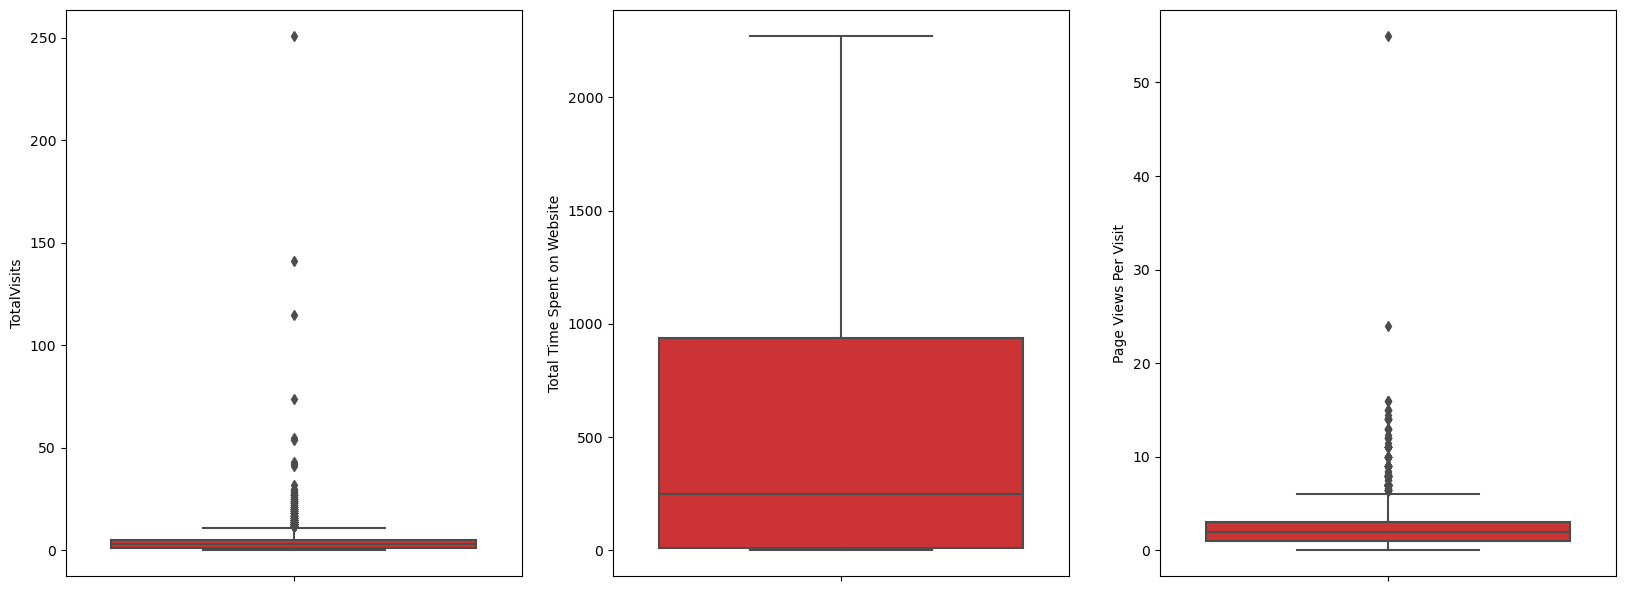

In [34]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set1', data = df_leadInfo)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set1', data = df_leadInfo)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set1', data = df_leadInfo)
plt.show()

In [35]:
# Removing the values beyond 99% for Total Visits

beyond_ninty_nine_total_visits = df_leadInfo['TotalVisits'].quantile(0.99)
df_leadInfo = df_leadInfo[df_leadInfo["TotalVisits"] < beyond_ninty_nine_total_visits]
df_leadInfo["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [36]:
# Lets check outliers at 25%,50%,75%,90%,95% and above

df_leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [37]:
# Removing values beyond 99% for Page Views Per Visit

beyond_ninty_nine_page_visits = df_leadInfo['Page Views Per Visit'].quantile(0.99)
df_leadInfo = df_leadInfo[df_leadInfo["Page Views Per Visit"] < beyond_ninty_nine_page_visits]
df_leadInfo["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [38]:
# Lets check outliers at 25%,50%,75%,90%,95% and above

df_leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [39]:
# Checking the percentage of data retained

retained_data = round(100*(len(df_leadInfo)/9240),2)
print(retained_data)

97.72


So, here the data has been cleaned and around 98% of the data has been retained.

# Step 3 : Data Analysis

Lets understand the data based on each columns effect on the conversion rates

In [40]:
df_leadInfo.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

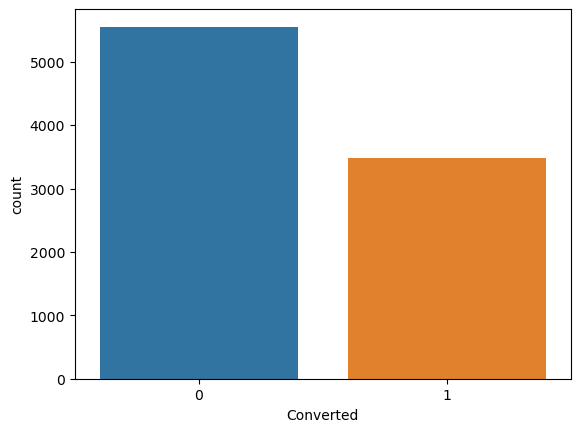

In [41]:
# Conversion rate

sns.countplot(data=df_leadInfo, x='Converted')
plt.show()

In [42]:
# Calculating conversion rate

conversion_rate = len(df_leadInfo[df_leadInfo.Converted==1])/(len(df_leadInfo))
print(conversion_rate*100)

38.50924797873519


So, we can see that the overall conversion rate is around 39%

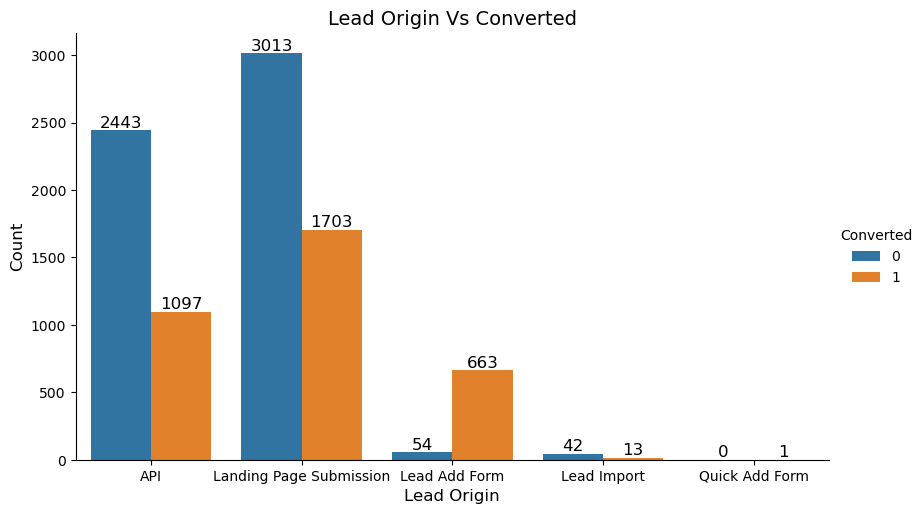

In [43]:
# Lead Origin Vs Converted

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=df_leadInfo, aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Printing the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')
    
plt.show()

So, we can see that the maximum conversion happened from Landing Page Submission. Also, there was only one request from Quick Add Form which got converted.

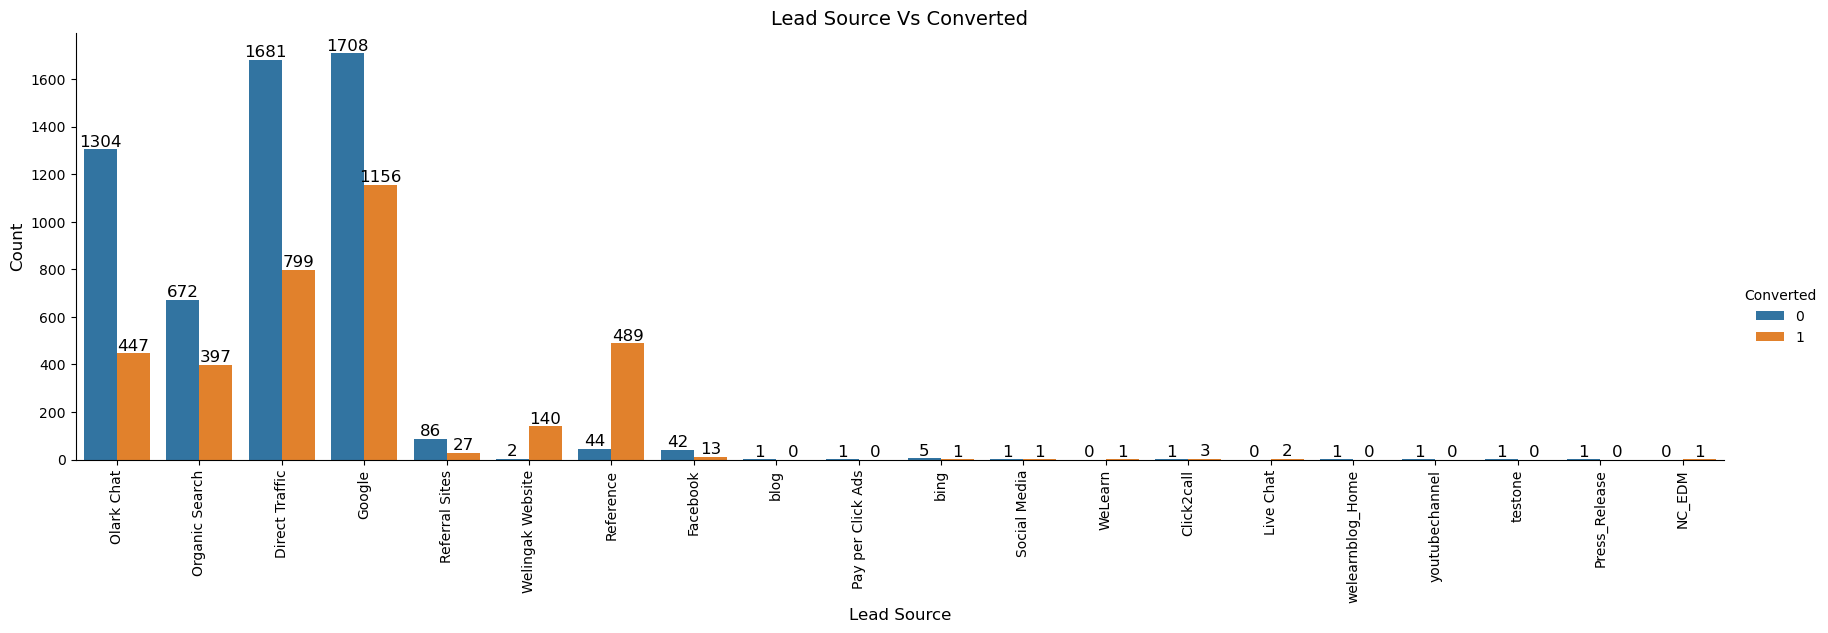

In [44]:
# Lead Source Vs Converted

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=df_leadInfo, aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Printing the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

So, we can see that major conversion in the lead source is from Google.

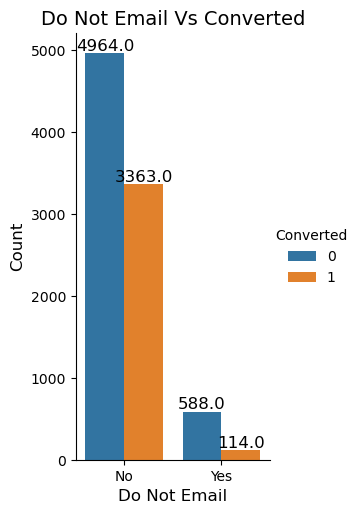

In [45]:
# Do not Email Vs Converted

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=df_leadInfo, aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

So, from the above graph we can see that major conversions have happened from the the emails that have been sent.

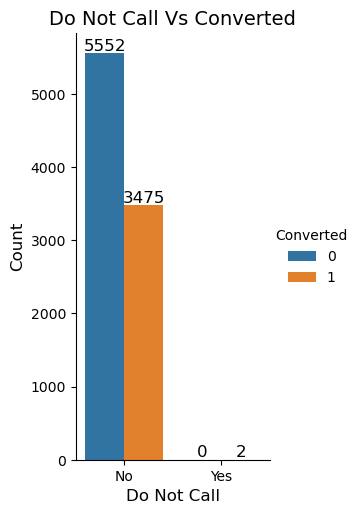

In [46]:
# Do not Call Vs Converted

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=df_leadInfo, aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

So from the above graph we can see that major conversions happened when the calls were made. But 2 leads still got converted even though they had opted for 'Do Not Call'.

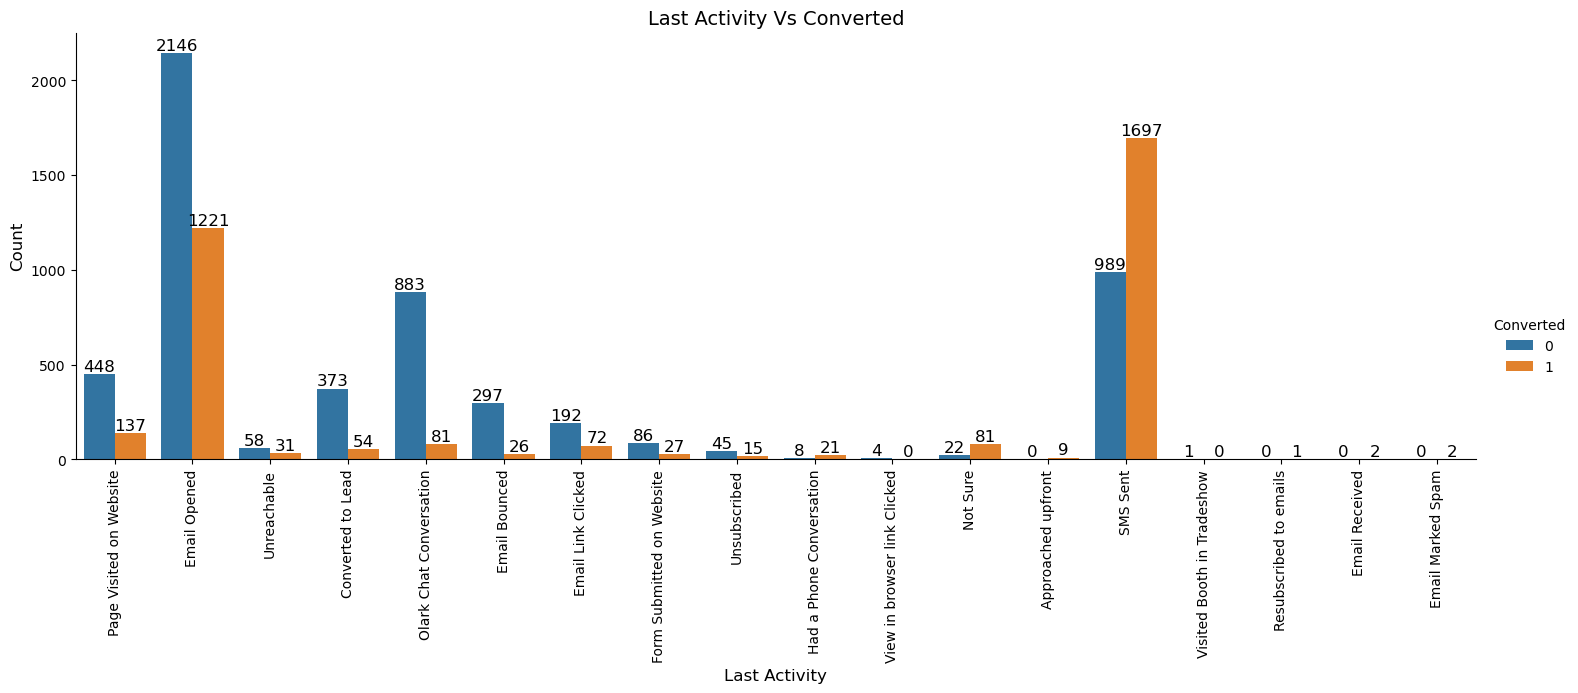

In [47]:
# Last Activity Vs Converted

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=df_leadInfo, aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

So from the above graph, we can see that Last Activity value 'SMS Sent' had more conversion.

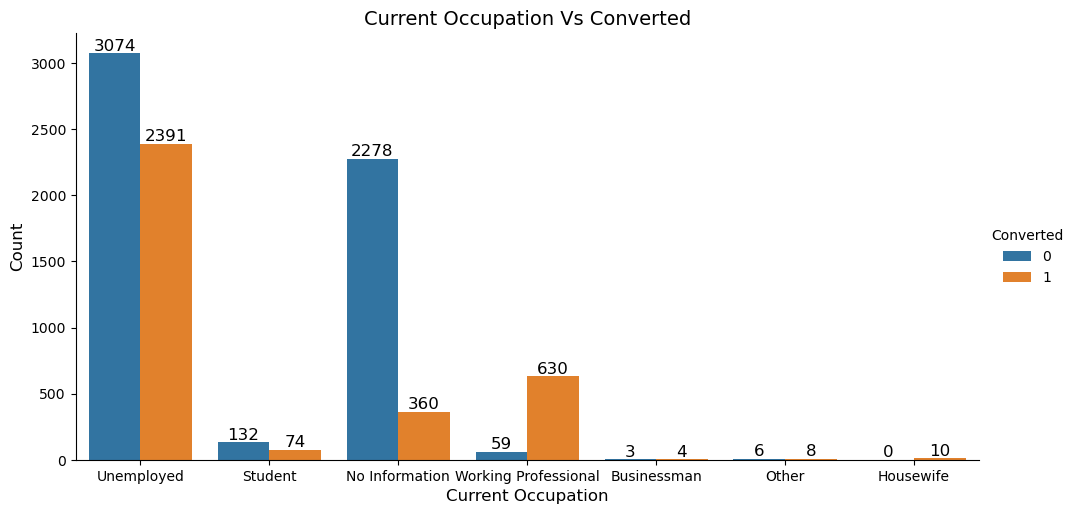

In [48]:
# What is your current occupation Vs Converted

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=df_leadInfo, 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

From the above graph we can say that people who are unemployed have converted more. Out of 7 businessman, 4 got converted. All the 10 out of 10 housewives got converted.

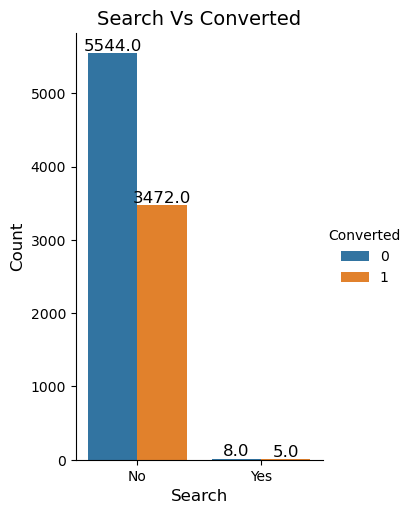

In [49]:
# Search Vs Converted

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=df_leadInfo, aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Conversion rate is high for leads who are not through search.

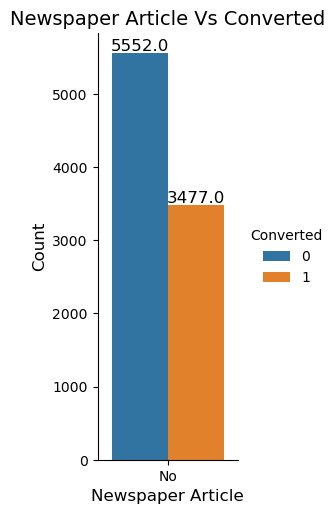

In [50]:
# Newspaper Article Vs Converted

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=df_leadInfo, aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

The Newspaper Article has only one value 'No', so we can drop this column.

In [51]:
# Lets drop the Newspaper Article column

df_leadInfo = df_leadInfo.drop(['Newspaper Article'], axis=1)

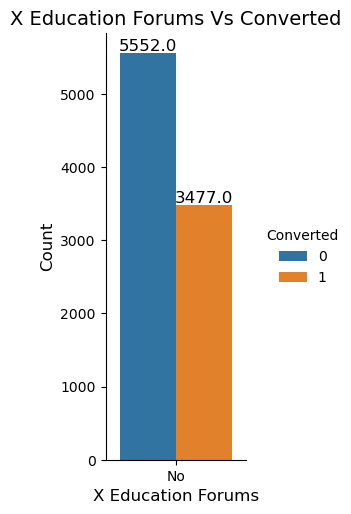

In [52]:
# X Education Forums Vs Converted

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=df_leadInfo, aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

The X Education Forums column has only one value 'No', so we can drop this column.

In [53]:
# Lets drop the X Education Forum column

df_leadInfo = df_leadInfo.drop(['X Education Forums'], axis=1)

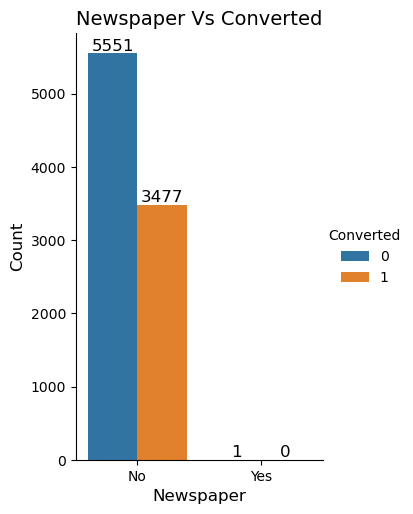

In [54]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=df_leadInfo, aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

The Newspaper column has only one row with "Yes" as the value and that too did not get converted, therefore we can drop this column.

In [55]:
# Lets drop the Newspaper column

df_leadInfo = df_leadInfo.drop(['Newspaper'], axis=1)

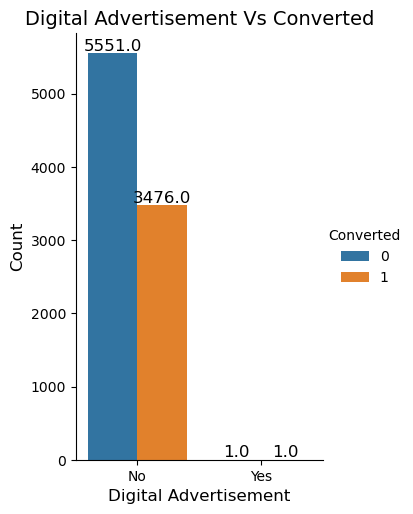

In [56]:
# Digital Advertisement Vs Converted

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=df_leadInfo, aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

From the above graph we can see that there are two leads from Digital Marketing, out of which one got converted.

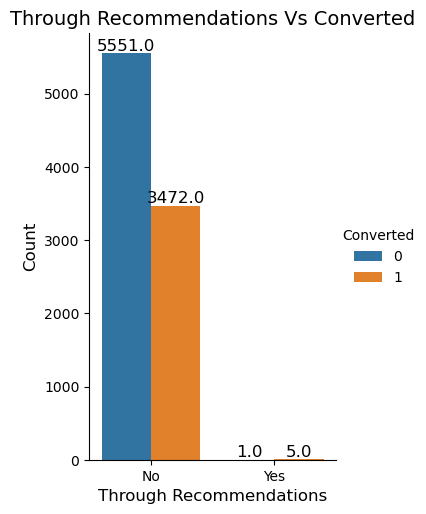

In [57]:
# Through Recommendations Vs Converted

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=df_leadInfo, aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

We can that six leads were from Recommendations out of which 5 got converted.

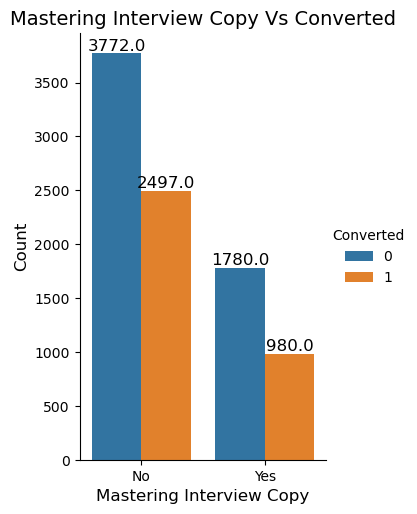

In [58]:
# Mastering Interview Copy Vs Converted

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=df_leadInfo,
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

There is a high conversion rate for those leads who do not want a free copy of Mastering Interviews.

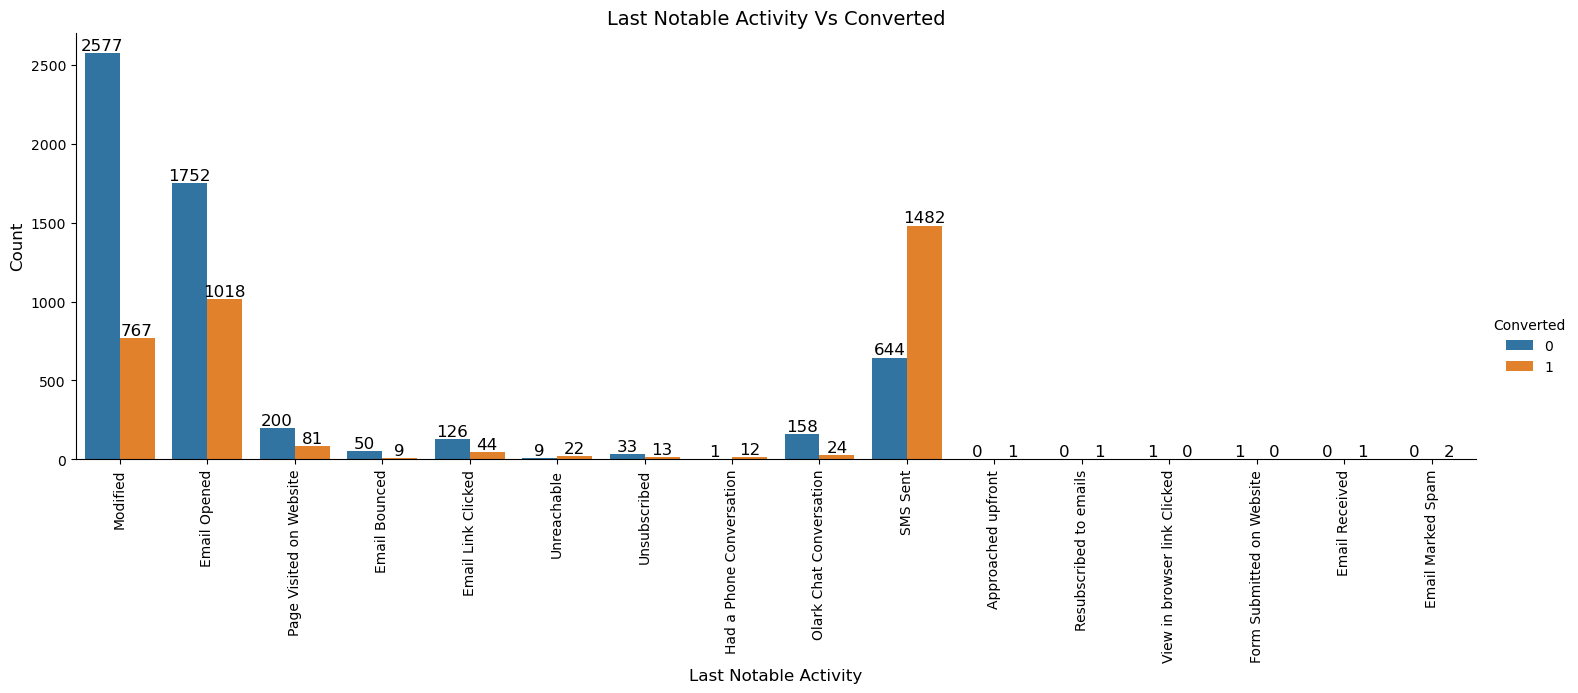

In [59]:
# Last Notable Activity Vs Converted

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=df_leadInfo, aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

From the above graph we can see that the conversion rate is high for "SMS Sent".

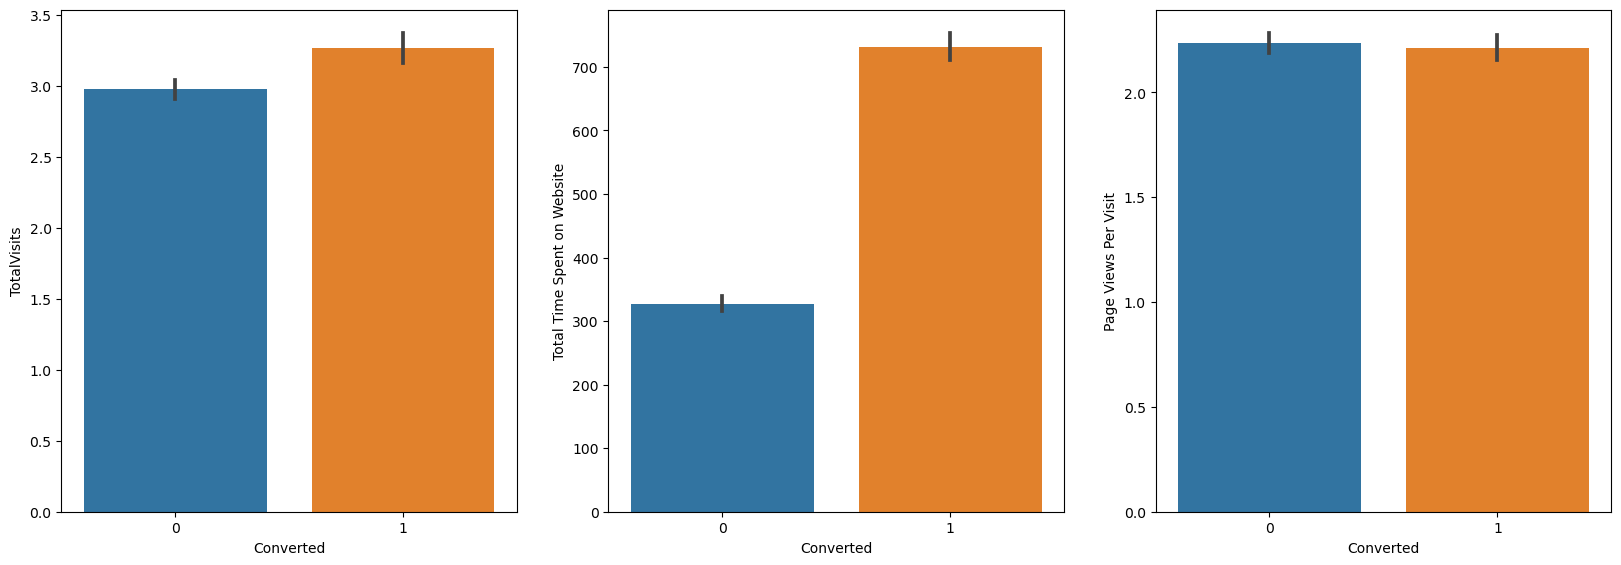

In [60]:
# Checking the conversions for all numeric values

plt.figure(figsize=(20,30))

plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = df_leadInfo)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = df_leadInfo)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = df_leadInfo)

plt.show()

So, we can say that the conversion rates are high for Total Visits, Total time spent on website and Page views per visit.

# Step 4 : Data Preparation (Dummy creation)

Lets convert some binary variables Yes/No to 0/1

In [61]:
var =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def map_binary(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map_binary function to the columns
df_leadInfo[var] = df_leadInfo[var].apply(map_binary)

In [62]:
# Creating dummies for the following columns below

# Lead Origin : 

dummy_lead_origin = pd.get_dummies(df_leadInfo['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
dummy_lead_origin1 = dummy_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
df_leadInfo = pd.concat([df_leadInfo, dummy_lead_origin1], axis = 1)

# Lead Source :

dummy_lead_source = pd.get_dummies(df_leadInfo['Lead Source'], prefix='LeadSource')
# Dropping blog column
dummy_lead_source1 = dummy_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
df_leadInfo = pd.concat([df_leadInfo,dummy_lead_source1], axis=1)

# last Activity

dummy_last_activity = pd.get_dummies(df_leadInfo['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
dummy_last_activity1 = dummy_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
df_leadInfo = pd.concat([df_leadInfo,dummy_last_activity1], axis=1)

# What is your current occupation

dummy_curr_occupation = pd.get_dummies(df_leadInfo['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
dummy_curr_occupation1 = dummy_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
df_leadInfo = pd.concat([df_leadInfo,dummy_curr_occupation1], axis=1)

# Last Notable Activity

dummy_last_notable_activity = pd.get_dummies(df_leadInfo['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
dummy_last_notable_activity1 = dummy_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
df_leadInfo = pd.concat([df_leadInfo,dummy_last_notable_activity1], axis=1)

df_leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
# Removing the following columns from the df_leadInfo

# 1) Prospect ID
# 2) Lead Numbers
# 3) Lead Origin
# 4) Lead Source
# 5) Last Activity
# 6) What is your current occupation
# 7) Last Notable Activity

df_leadInfo = df_leadInfo.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [64]:
# Checking the info

df_leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [65]:
# Checking the percentage of null values in each of the columns

null_perc = round(100*(df_leadInfo.isnull().sum()/len(df_leadInfo.index)), 2)
print(null_perc)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [66]:
# Checking the shape of the data frame df_leadInfo

df_leadInfo.shape

(9029, 71)

As we can see that there are 71 columns in the dataframe, so we will not see correlation using heatmap as the data is huge.

# Step 5 : Train-Test split

In [67]:
# Importing packages/libraries

from sklearn.model_selection import train_test_split

In [68]:
# Feature variable X

X = df_leadInfo.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [69]:
# Target variable y

y = df_leadInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Lets split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# Step 6 : Rescaling the features

In [71]:
from sklearn.preprocessing import MinMaxScaler # importing the necessary library/package

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [72]:
# Lets check the conversion rate percentage

conversion_rate = (sum(df_leadInfo['Converted'])/len(df_leadInfo['Converted'].index))*100
conversion_rate

38.50924797873519

### So, we can see that the conversion rate is almost 39%

# Step 7 : Model building

Lets assess the model with StatsModels

### Initial Training Model

In [73]:
import statsmodels.api as sm

In [74]:
# Logistic regression model

log_m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 16 Oct 2023   Deviance:                   1.6560e+05
Time:                        19:47:29   Pearson chi2:                 8.10e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             1.669e+15    6.4e+07   2.61e+07      0.000    1.67e+15    1.67e+15
Do Not Email                                     -1.446e+14   4.48e+06  -3.23e+07      0.000   -1.45e+14   -1.45e+14
Do Not Call                                       4.569e+15   4.76e+07    9.6e+07      0.000    4.57e+15    4.57e+15
TotalVisits                                       1.018e+15   7.66e+06   1.33e+08      0.000    1.02e+15    1.02e+15
Total Time Spent on Website                       3.088e+15   4.01e+06    7.7e+08      0.000    3.09e+15    3.09e+15
Page Views Per Visit                             -4.656e+14   6.53e+06  -7.13e+07      0.000   -4.66e+14   -4.66e+14
Search                                             -1.3e+15   2.44e+07  -5.33e+07      0.000    -1.3e+15    -1.3e+15
Digital Advertisement                             1.231e+12   4.76e+07   2.59e+04      0.000    1.23e+12    1.23e+12
Through Recommendations                           8.455e+14    4.2e+07   2.01e+07      0.000    8.46e+14    8.46e+14
A free copy of Mastering The Interview            -1.36e+14   2.69e+06  -5.05e+07      0.000   -1.36e+14   -1.36e+14
LeadOrigin_API                                   -3.456e+15   6.74e+07  -5.13e+07      0.000   -3.46e+15   -3.46e+15
LeadOrigin_Landing Page Submission               -3.422e+15   6.74e+07  -5.08e+07      0.000   -3.42e+15   -3.42e+15
LeadOrigin_Lead Add Form                         -2.624e+15   6.86e+07  -3.82e+07      0.000   -2.62e+15   -2.62e+15
LeadOrigin_Lead Import                           -2.455e+15   8.27e+07  -2.97e+07      0.000   -2.46e+15   -2.46e+15
LeadSource_Click2call                             2.674e+15   4.69e+07   5.71e+07      0.000    2.67e+15    2.67e+15
LeadSource_Direct Traffic                         9.964e+14   1.17e+07   8.53e+07      0.000    9.96e+14    9.96e+14
LeadSource_Facebook                               5.737e+14   4.62e+07   1.24e+07      0.000    5.74e+14    5.74e+14
LeadSource_Google                                 1.238e+15   1.15e+07   1.08e+08      0.000    1.24e+15    1.24e+15
LeadSource_Live Chat                               6.14e+15   4.67e+07   1.31e+08      0.000    6.14e+15    6.14e+15
LeadSource_Olark Chat                             1.206e+15   1.18e+07   1.02e+08      0.000    1.21e+15    1.21e+15
LeadSource_Organic Search                         1.139e+15   1.18e+07   9.67e+07      0.000    1.14e+15    1.14e+15
LeadSource_Pay per Click Ads                         0.1755   2.22e-07   7.91e+05      0.000       0.176       0.176
LeadSource_Press_Release                            17.2466   3.75e-07    4.6e+07      0.000      17.247      17.247
LeadSource_Reference                     

# Step 8 : Feature selection (using RFE)

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [76]:
from sklearn.feature_selection import RFE

# Selecting 20 features

rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [77]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False])

In [78]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 45),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 37),
 ('LeadOrigin_API', False, 9),
 ('LeadOrigin_Landing Page Submission', False, 8),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 20),
 ('LeadSource_Click2call', False, 29),
 ('LeadSource_Direct Traffic', False, 16),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 27),
 ('LeadSource_Live Chat', False, 38),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 26),
 ('LeadSource_Pay per Click Ads', False, 46),
 ('LeadSource_Press_Release', False, 50),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 25),
 ('LeadSource_Social Media', False, 41),
 ('LeadSource_WeLearn', False, 47),
 

In [79]:
# Lets see the variable shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Opened', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

### Model - 2

In [80]:
X_train_sm = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.1
Date:                Mon, 16 Oct 2023   Deviance:                       5002.3
Time:                        19:47:34   Pearson chi2:                 6.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4205
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5570      0.153    -16.659      0.000      -2.858      -2.256
Do Not Email                                    -1.1023      0.176     -6.276      0.000      -1.447      -0.758
TotalVisits                                      1.7989      0.290      6.206      0.000       1.231       2.367
Total Time Spent on Website                      4.5119      0.169     26.717      0.000       4.181       4.843
Page Views Per Visit                            -0.8642      0.250     -3.453      0.001      -1.355      -0.374
Search                                          -1.6356      1.011     -1.618      0.106      -3.617       0.346
LeadOrigin_Lead Add Form                         3.0358      0.512      5.932      0.000       2.033       4.039
LeadSource_Olark Chat                            1.4699      0.134     10.947      0.000       1.207       1.733
LeadSource_Reference                             0.6403      0.540      1.185      0.236      -0.418       1.699
LeadSource_Welingak Website                      2.6586      0.876      3.036      0.002       0.942       4.375
LastActivity_Approached upfront                 23.9469   2.63e+04      0.001      0.999   -5.16e+04    5.17e+04
LastActivity_Email Opened                        0.5394      0.117      4.599      0.000       0.310       0.769
LastActivity_Had a Phone Conversation            1.1718      0.939      1.248      0.212      -0.668       3.011
LastActivity_Olark Chat Conversation            -0.5893      0.190     -3.101      0.002      -0.962      -0.217
LastActivity_SMS Sent                            1.7403      0.118     14.697      0.000       1.508       1.972
CurrentOccupation_Housewife                     23.9667   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
CurrentOccupation_No Information                -1.2346      0.090    -13.681      0.000      -1.411      -1.058
CurrentOccupation_Working Professional           2.6225      0.203     12.889      0.000       2.224       3.021
LastNotableActivity_Had a Phone Conversation     2.3799      1.501      1.585      0.113      -0.562       5.322
LastNotableActivity_Modified                    -0.5521      0.090     -6.131      0.000      -0.729      -0.376
LastNotableActivity_Unreachable                  2.0387      0.556      3.665      0.000       0.948       3.129
================================================================================================================
"""

In [81]:
# Lets remove the column LastActivity_Approached_Upfront as it has a high pvalue, therefore it is insignificant.

col = col.drop('LastActivity_Approached upfront',1)

### Model - 3

In [82]:
X_train_sm = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Mon, 16 Oct 2023   Deviance:                       5013.2
Time:                        19:47:34   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4195
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5414      0.153    -16.608      0.000      -2.841      -2.241
Do Not Email                                    -1.1140      0.175     -6.350      0.000      -1.458      -0.770
TotalVisits                                      1.7878      0.290      6.171      0.000       1.220       2.356
Total Time Spent on Website                      4.5173      0.169     26.768      0.000       4.187       4.848
Page Views Per Visit                            -0.8483      0.250     -3.393      0.001      -1.338      -0.358
Search                                          -1.6363      1.012     -1.617      0.106      -3.620       0.347
LeadOrigin_Lead Add Form                         3.0402      0.511      5.946      0.000       2.038       4.042
LeadSource_Olark Chat                            1.4873      0.134     11.087      0.000       1.224       1.750
LeadSource_Reference                             0.6399      0.540      1.186      0.236      -0.418       1.698
LeadSource_Welingak Website                      2.6555      0.875      3.034      0.002       0.940       4.371
LastActivity_Email Opened                        0.5164      0.117      4.424      0.000       0.288       0.745
LastActivity_Had a Phone Conversation            1.1429      0.939      1.218      0.223      -0.697       2.982
LastActivity_Olark Chat Conversation            -0.6220      0.190     -3.282      0.001      -0.994      -0.250
LastActivity_SMS Sent                            1.7182      0.118     14.579      0.000       1.487       1.949
CurrentOccupation_Housewife                     22.9568   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
CurrentOccupation_No Information                -1.2409      0.090    -13.758      0.000      -1.418      -1.064
CurrentOccupation_Working Professional           2.6161      0.203     12.868      0.000       2.218       3.015
LastNotableActivity_Had a Phone Conversation     2.3908      1.501      1.592      0.111      -0.552       5.333
LastNotableActivity_Modified                    -0.5431      0.090     -6.041      0.000      -0.719      -0.367
LastNotableActivity_Unreachable                  2.0197      0.556      3.630      0.000       0.929       3.110
================================================================================================================
"""

In [83]:
# Lets remove the column CurrentOccupation_Housewife as it has a high pvalue, therefore it is insignificant.

col = col.drop('CurrentOccupation_Housewife',1)

### Model - 4

In [84]:
X_train_sm = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.3
Date:                Mon, 16 Oct 2023   Deviance:                       5026.7
Time:                        19:47:34   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4183
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5270      0.153    -16.565      0.000      -2.826      -2.228
Do Not Email                                    -1.1188      0.175     -6.380      0.000      -1.463      -0.775
TotalVisits                                      1.7768      0.289      6.139      0.000       1.210       2.344
Total Time Spent on Website                      4.5123      0.169     26.772      0.000       4.182       4.843
Page Views Per Visit                            -0.8528      0.250     -3.414      0.001      -1.342      -0.363
Search                                          -1.6358      1.011     -1.619      0.106      -3.617       0.345
LeadOrigin_Lead Add Form                         3.0313      0.511      5.930      0.000       2.029       4.033
LeadSource_Olark Chat                            1.4768      0.134     11.028      0.000       1.214       1.739
LeadSource_Reference                             0.6579      0.539      1.220      0.223      -0.399       1.715
LeadSource_Welingak Website                      2.6524      0.875      3.030      0.002       0.937       4.368
LastActivity_Email Opened                        0.5166      0.116      4.440      0.000       0.289       0.745
LastActivity_Had a Phone Conversation            1.1276      0.939      1.201      0.230      -0.712       2.967
LastActivity_Olark Chat Conversation            -0.6290      0.189     -3.322      0.001      -1.000      -0.258
LastActivity_SMS Sent                            1.7107      0.118     14.551      0.000       1.480       1.941
CurrentOccupation_No Information                -1.2457      0.090    -13.822      0.000      -1.422      -1.069
CurrentOccupation_Working Professional           2.6078      0.203     12.834      0.000       2.210       3.006
LastNotableActivity_Had a Phone Conversation     2.3999      1.501      1.598      0.110      -0.543       5.343
LastNotableActivity_Modified                    -0.5378      0.090     -5.995      0.000      -0.714      -0.362
LastNotableActivity_Unreachable                  2.0149      0.556      3.621      0.000       0.924       3.105
================================================================================================================
"""

In [85]:
# Lets remove the column LastActivity_Had a Phone Conversation as it has a high pvalue, therefore it is insignificant.

col = col.drop('LastActivity_Had a Phone Conversation',1)

### Model - 5

In [86]:
X_train_sm = sm.add_constant(X_train[col])
log_m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Mon, 16 Oct 2023   Deviance:                       5028.2
Time:                        19:47:34   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4181
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5174      0.152    -16.541      0.000      -2.816      -2.219
Do Not Email                                    -1.1242      0.175     -6.414      0.000      -1.468      -0.781
TotalVisits                                      1.7711      0.289      6.122      0.000       1.204       2.338
Total Time Spent on Website                      4.5135      0.169     26.784      0.000       4.183       4.844
Page Views Per Visit                            -0.8513      0.250     -3.409      0.001      -1.341      -0.362
Search                                          -1.6344      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.0307      0.511      5.931      0.000       2.029       4.032
LeadSource_Olark Chat                            1.4756      0.134     11.022      0.000       1.213       1.738
LeadSource_Reference                             0.6636      0.539      1.231      0.219      -0.393       1.721
LeadSource_Welingak Website                      2.6507      0.875      3.029      0.002       0.935       4.366
LastActivity_Email Opened                        0.5072      0.116      4.373      0.000       0.280       0.735
LastActivity_Olark Chat Conversation            -0.6397      0.189     -3.383      0.001      -1.010      -0.269
LastActivity_SMS Sent                            1.7015      0.117     14.517      0.000       1.472       1.931
CurrentOccupation_No Information                -1.2474      0.090    -13.845      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6117      0.203     12.860      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5194      1.177      2.989      0.003       1.212       5.827
LastNotableActivity_Modified                    -0.5343      0.090     -5.961      0.000      -0.710      -0.359
LastNotableActivity_Unreachable                  2.0066      0.556      3.606      0.000       0.916       3.097
================================================================================================================
"""

In [87]:
# Lets remove the column LeadSource_Reference as it has a high pvalue, therefore it is insignificant.

col = col.drop('LeadSource_Reference',1)

### Model - 6

In [88]:
X_train_sm = sm.add_constant(X_train[col])
log_m6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.8
Date:                Mon, 16 Oct 2023   Deviance:                       5029.6
Time:                        19:47:34   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4180
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5134      0.152    -16.526      0.000      -2.811      -2.215
Do Not Email                                    -1.1458      0.175     -6.537      0.000      -1.489      -0.802
TotalVisits                                      1.7681      0.289      6.111      0.000       1.201       2.335
Total Time Spent on Website                      4.5139      0.168     26.791      0.000       4.184       4.844
Page Views Per Visit                            -0.8508      0.250     -3.407      0.001      -1.340      -0.361
Search                                          -1.6345      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.6170      0.208     17.383      0.000       3.209       4.025
LeadSource_Olark Chat                            1.4744      0.134     11.013      0.000       1.212       1.737
LeadSource_Welingak Website                      2.0666      0.742      2.786      0.005       0.613       3.520
LastActivity_Email Opened                        0.5049      0.116      4.358      0.000       0.278       0.732
LastActivity_Olark Chat Conversation            -0.6424      0.189     -3.399      0.001      -1.013      -0.272
LastActivity_SMS Sent                            1.6972      0.117     14.497      0.000       1.468       1.927
CurrentOccupation_No Information                -1.2473      0.090    -13.844      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6144      0.203     12.880      0.000       2.217       3.012
LastNotableActivity_Had a Phone Conversation     3.5160      1.177      2.986      0.003       1.208       5.824
LastNotableActivity_Modified                    -0.5339      0.090     -5.958      0.000      -0.710      -0.358
LastNotableActivity_Unreachable                  2.0050      0.556      3.606      0.000       0.915       3.095
================================================================================================================
"""

In [89]:
# Lets remove the column Search as it has a high pvalue, therefore it is insignificant.

col = col.drop('Search',1)

### Model - 7

In [90]:
X_train_sm = sm.add_constant(X_train[col])
log_m7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.2
Date:                Mon, 16 Oct 2023   Deviance:                       5032.5
Time:                        19:47:34   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4177
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5028      0.152    -16.475      0.000      -2.801      -2.205
Do Not Email                                    -1.1452      0.175     -6.536      0.000      -1.489      -0.802
TotalVisits                                      1.7397      0.289      6.023      0.000       1.174       2.306
Total Time Spent on Website                      4.5109      0.168     26.784      0.000       4.181       4.841
Page Views Per Visit                            -0.8591      0.250     -3.442      0.001      -1.348      -0.370
LeadOrigin_Lead Add Form                         3.6099      0.208     17.356      0.000       3.202       4.018
LeadSource_Olark Chat                            1.4653      0.134     10.951      0.000       1.203       1.728
LeadSource_Welingak Website                      2.0660      0.742      2.786      0.005       0.612       3.520
LastActivity_Email Opened                        0.5006      0.116      4.323      0.000       0.274       0.728
LastActivity_Olark Chat Conversation            -0.6438      0.189     -3.408      0.001      -1.014      -0.273
LastActivity_SMS Sent                            1.6955      0.117     14.489      0.000       1.466       1.925
CurrentOccupation_No Information                -1.2447      0.090    -13.822      0.000      -1.421      -1.068
CurrentOccupation_Working Professional           2.6123      0.203     12.869      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5184      1.176      2.991      0.003       1.213       5.824
LastNotableActivity_Modified                    -0.5330      0.090     -5.949      0.000      -0.709      -0.357
LastNotableActivity_Unreachable                  2.0055      0.556      3.607      0.000       0.916       3.095
================================================================================================================
"""

In [91]:
# Lets check VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.11
1,TotalVisits,4.70
7,LastActivity_Email Opened,2.37
2,Total Time Spent on Website,2.14
9,LastActivity_SMS Sent,2.12
5,LeadSource_Olark Chat,2.10
13,LastNotableActivity_Modified,1.78
8,LastActivity_Olark Chat Conversation,1.76
4,LeadOrigin_Lead Add Form,1.62
10,CurrentOccupation_No Information,1.57


In [92]:
# 'Page Views Per Visit' column has a little high VIF, so can drop it.

col = col.drop('Page Views Per Visit',1)

### Model - 8

In [93]:
X_train_sm = sm.add_constant(X_train[col])
log_m8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.2
Date:                Mon, 16 Oct 2023   Deviance:                       5044.4
Time:                        19:47:35   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4166
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.6532      0.146    -18.185      0.000      -2.939      -2.367
Do Not Email                                    -1.1622      0.175     -6.649      0.000      -1.505      -0.820
TotalVisits                                      1.2254      0.247      4.954      0.000       0.741       1.710
Total Time Spent on Website                      4.5066      0.168     26.758      0.000       4.176       4.837
LeadOrigin_Lead Add Form                         3.7825      0.202     18.683      0.000       3.386       4.179
LeadSource_Olark Chat                            1.6450      0.124     13.263      0.000       1.402       1.888
LeadSource_Welingak Website                      2.0756      0.742      2.799      0.005       0.622       3.529
LastActivity_Email Opened                        0.4606      0.115      4.008      0.000       0.235       0.686
LastActivity_Olark Chat Conversation            -0.6504      0.188     -3.453      0.001      -1.020      -0.281
LastActivity_SMS Sent                            1.6433      0.116     14.213      0.000       1.417       1.870
CurrentOccupation_No Information                -1.2327      0.090    -13.734      0.000      -1.409      -1.057
CurrentOccupation_Working Professional           2.6138      0.203     12.876      0.000       2.216       3.012
LastNotableActivity_Had a Phone Conversation     3.4487      1.174      2.937      0.003       1.147       5.750
LastNotableActivity_Modified                    -0.5446      0.089     -6.095      0.000      -0.720      -0.369
LastNotableActivity_Unreachable                  1.9285      0.560      3.442      0.001       0.830       3.027
================================================================================================================
"""

In [94]:
# Lets check VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.63
2,Total Time Spent on Website,2.11
6,LastActivity_Email Opened,2.06
4,LeadSource_Olark Chat,1.94
8,LastActivity_SMS Sent,1.86
7,LastActivity_Olark Chat Conversation,1.75
12,LastNotableActivity_Modified,1.68
3,LeadOrigin_Lead Add Form,1.57
9,CurrentOccupation_No Information,1.57
5,LeadSource_Welingak Website,1.30


Model 8 seems to be stable with significant pvalues, lets go ahead with this model for further analysis.

In [95]:
# Lets get the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.701779
113     0.591069
4132    0.765682
5573    0.129061
1109    0.013213
2282    0.030126
2976    0.869418
8431    0.460064
2770    0.739865
5790    0.995442
dtype: float64

In [96]:
# Lets Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70177929, 0.59106932, 0.76568166, 0.12906116, 0.01321321,
       0.03012638, 0.86941758, 0.4600642 , 0.7398654 , 0.99544236])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [97]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.701779,2240
1,0,0.591069,113
2,1,0.765682,4132
3,0,0.129061,5573
4,0,0.013213,1109


Lets create new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [98]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.701779,2240,1
1,0,0.591069,113,1
2,1,0.765682,4132,1
3,0,0.129061,5573,0
4,0,0.013213,1109,0


Checking the confusion metrics and accuracy

In [99]:
from sklearn import metrics

In [100]:
# Lets create the confusion matrix 

cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(cm)

[[3413  445]
 [ 708 1754]]


In [101]:
# Predicted     not_converted    converted
# Actual
# not_converted        3413      445
# converted            708       1754

In [102]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8175632911392405


Accuracy is 81.7% which is good. We will also calculate the other metrics as we cannot depend only on the accuracy metrics.

In [103]:
# Lets check VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.63
2,Total Time Spent on Website,2.11
6,LastActivity_Email Opened,2.06
4,LeadSource_Olark Chat,1.94
8,LastActivity_SMS Sent,1.86
7,LastActivity_Olark Chat Conversation,1.75
12,LastNotableActivity_Modified,1.68
3,LeadOrigin_Lead Add Form,1.57
9,CurrentOccupation_No Information,1.57
5,LeadSource_Welingak Website,1.30


These variables have good VIF values. Therefore we don't have to drop any more variables and we can proceed with making predictions using this model only.

#### Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [104]:
TP = cm[1,1] # True Positive 
TN = cm[0,0] # True Negatives
FP = cm[0,1] # False Positive
FN = cm[1,0] # False Negatives

In [105]:
# Sensitivity of our logistic regression model

TP / float(TP+FN)

0.7124289195775793

In [106]:
# Specificity

TN / float(TN+FP)

0.8846552617936755

In [107]:
# false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11534473820632452


In [108]:
# positive predictive value 

print (TP / float(TP+FP))

0.7976352887676217


In [109]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8281970395535064


# Step 9 : ROC curve

In [110]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

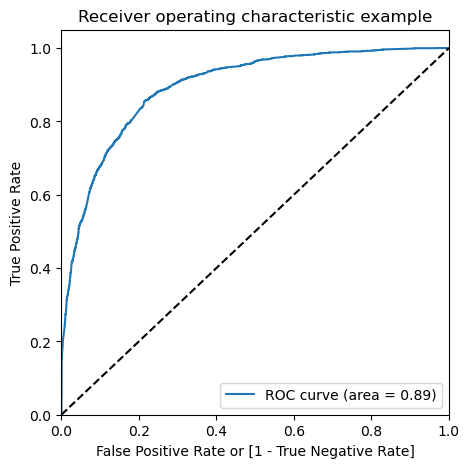

In [112]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 10 : Finding optimal cutoff

Optimal cut off probability is that where sensitivity and specificity are balanced.

In [113]:
# Creating columns with different probability cutoffs

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.701779,2240,1,1,1,1,1,1,1,1,1,0,0
1,0,0.591069,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.765682,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.129061,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.013213,1109,0,1,0,0,0,0,0,0,0,0,0


In [114]:
# Calculating the accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = cm[1,1] # true positive 
# TN = cm[0,0] # true negatives
# FP = cm[0,1] # false positives
# FN = cm[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.657278  0.972380  0.456195
0.2   0.2  0.760759  0.923233  0.657076
0.3   0.3  0.803165  0.878554  0.755054
0.4   0.4  0.815348  0.780260  0.837740
0.5   0.5  0.817563  0.712429  0.884655
0.6   0.6  0.808703  0.638911  0.917055
0.7   0.7  0.784810  0.530869  0.946864
0.8   0.8  0.763291  0.444354  0.966822
0.9   0.9  0.718987  0.299350  0.986781


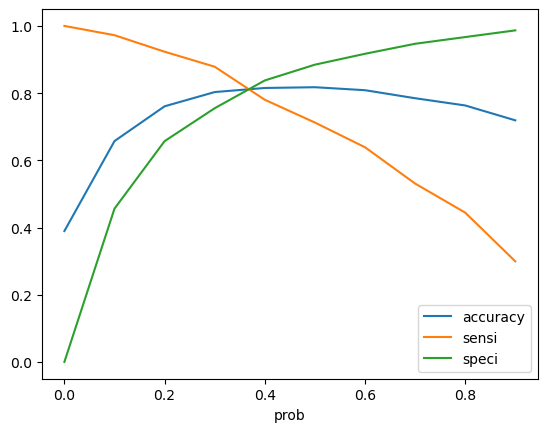

In [115]:
# Plotting accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

So, from the above curve, we can see that 0.37 is the optimum point for cutoff probability.

In [116]:
# Making final prediction using 0.37 as cutoff

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.701779,2240,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.591069,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.765682,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.129061,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.013213,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [117]:
# Calculating lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.701779,2240,1,1,1,1,1,1,1,1,1,0,0,1,70
1,0,0.591069,113,1,1,1,1,1,1,1,0,0,0,0,1,59
2,1,0.765682,4132,1,1,1,1,1,1,1,1,1,0,0,1,77
3,0,0.129061,5573,0,1,1,0,0,0,0,0,0,0,0,0,13
4,0,0.013213,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.030126,2282,0,1,0,0,0,0,0,0,0,0,0,0,3
6,1,0.869418,2976,1,1,1,1,1,1,1,1,1,1,0,1,87
7,0,0.460064,8431,0,1,1,1,1,1,0,0,0,0,0,1,46
8,1,0.739865,2770,1,1,1,1,1,1,1,1,1,0,0,1,74
9,1,0.995442,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [118]:
# Lets check if 80% cases are correctly predicted based on the converted column.

# Getting the total of final predicted conversion / non conversion counts from the actual converted rates

check_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
check_df['final_predicted'].value_counts()

1    1975
0     487
Name: final_predicted, dtype: int64

In [119]:
# Precentage of final_predicted conversions

1975/float(1975+487)

0.8021933387489846

We can see that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement. Therefore this model is good.

### Overall Metrics

In [120]:
# Overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8136075949367089

In [121]:
cm2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
cm2

array([[3167,  691],
       [ 487, 1975]], dtype=int64)

In [122]:
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

In [123]:
# Sensitivity of our logistic regression model

TP / float(TP+FN)

0.8021933387489846

In [124]:
# Specificity

TN / float(TN+FP)

0.8208916537065837

In [125]:
# False postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.17910834629341627


In [126]:
# Calculating positive predictive value 

print (TP / float(TP+FP))

0.7408102025506377


In [127]:
# Calculating negative predictive value

print (TN / float(TN+ FN))

0.8667214012041599


### Metrics - Precision and Recall

In [128]:
# Checking confusion matrix again

cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
cm

array([[3413,  445],
       [ 708, 1754]], dtype=int64)

In [129]:
from sklearn.metrics import precision_score, recall_score

In [130]:
# Checking precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7976352887676217

In [131]:
# Checking recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7124289195775793

### Precision and Recall tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

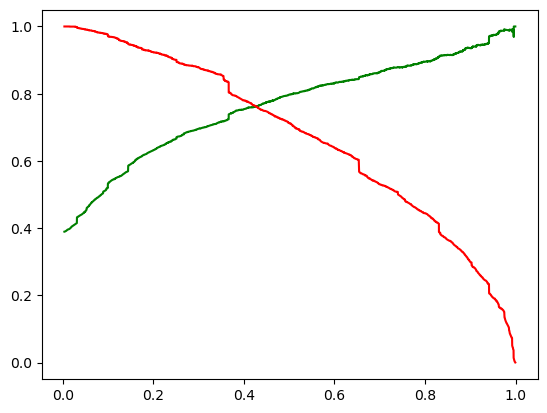

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11 : Predictions on test set

In [136]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [137]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
2296,0,0.1875,0.665313,0,0,0,0,0,1,0,0,0,0,0
8697,0,0.4375,0.184032,0,0,0,0,0,1,0,0,0,0,0
7378,0,0.1250,0.163284,0,0,0,1,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,0,1,0,0,0,1,0
4799,0,0.5000,0.744700,0,0,0,0,0,1,0,0,0,0,0


In [138]:
X_test_sm = sm.add_constant(X_test)

Making predictions on test set

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

2296    0.901868
8697    0.587969
7378    0.213572
8631    0.660152
4799    0.950680
4503    0.354912
7129    0.872954
1717    0.144281
8398    0.867851
5116    0.251214
dtype: float64

In [141]:
# Lets convert y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [142]:
# Let's see the head

y_pred_1.head()

,0
2296,0.901868
8697,0.587969
7378,0.213572
8631,0.660152
4799,0.950680


In [143]:
# Lets convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [144]:
# Making LeadId as index

y_test_df['LeadId'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [147]:
# Checking the head

y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.901868
1,0,8697,0.587969
2,0,7378,0.213572
3,0,8631,0.660152
4,1,4799,0.950680


In [148]:
# Lets rename the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [149]:
# Lets rearrange the columns

y_pred_final = y_pred_final[['LeadId','Converted','Converted_Prob']]

In [150]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,2296,1,0.901868
1,8697,0,0.587969
2,7378,0,0.213572
3,8631,0,0.660152
4,4799,1,0.950680


In [151]:
# Based on cutoff threshold using accuracy, sensitivity and specificity of 0.37

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [152]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,2296,1,0.901868,1
1,8697,0,0.587969,1
2,7378,0,0.213572,0
3,8631,0,0.660152,1
4,4799,1,0.950680,1


In [153]:
# Lets calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,2296,1,0.901868,1,90
1,8697,0,0.587969,1,59
2,7378,0,0.213572,0,21
3,8631,0,0.660152,1,66
4,4799,1,0.950680,1,95
5,4503,0,0.354912,0,35
6,7129,0,0.872954,1,87
7,1717,0,0.144281,0,14
8,8398,0,0.867851,1,87
9,5116,1,0.251214,0,25


In [154]:
# Lets check if 80% cases are correctly predicted based on the converted column.

# Getting the total of final predicted conversion or non conversion counts from the actual converted rates

check_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
check_test_df['final_predicted'].value_counts()

1    806
0    209
Name: final_predicted, dtype: int64

In [155]:
# Percentage of final_predicted conversions on test data

806/float(806+209)

0.7940886699507389

So, we can see that the final prediction of conversions have a target rate of 79% (79.4%) (Around 1 % short of the predictions made on training data set)

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [156]:
# Accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8132152085640457

In [157]:
cm2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
cm2

array([[1397,  297],
       [ 209,  806]], dtype=int64)

In [158]:
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

In [159]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7940886699507389

In [160]:
# Specificity
TN / float(TN+FP)

0.8246753246753247

Precision and Recall metrics for the test set

In [161]:
# Precision
print('Precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# Recall
print('Recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision  0.7307343608340888
Recall  0.7940886699507389


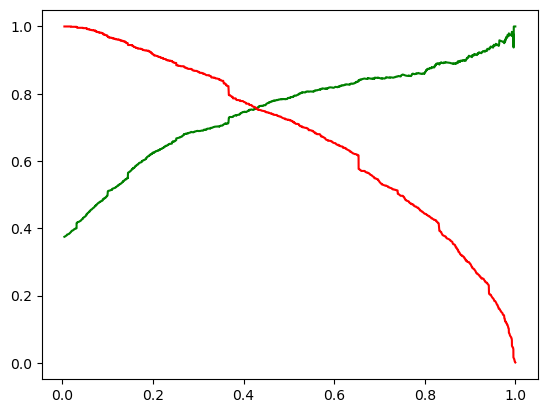

In [162]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Conclusion :

#### - We have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cutoff based on Sensitivity-Specificity for calculating final prediction.

#### - Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are pretty much closer to the respected values of trained set.

#### - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model to be around 80%

#### - So, overall this model seeems to be good.